# Fake News Classifier Using LSTM

1) dataste
2)  independent and dependent features
3)  cleaning the data i) stemming ii)stopwords
4)  fix a sentence length to fix the input
5) one hot representation, embedding layer
6) LSTM neural network

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/WELFake_Dataset.csv")

In [3]:
df.shape
#72134 rows and 4 columns

(72134, 4)

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [7]:
# remove null values
### Drop Nan values bcz it is categorical data
# if data is numerical then replace 
df = df.dropna()

In [8]:
df.shape

(71537, 4)

In [9]:
# get the independent features
X = df.drop('label', axis=1)

In [10]:
# get dependent variable
y = df['label']

In [11]:
y.shape

(71537,)

In [13]:
import re
import nltk
from nltk.corpus import stopwords

In [14]:
# Download stopwords if not available
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Text Cleaning + Stemming

In [15]:
# dataset preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['title'].iloc[i])  # keep only letters
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

# One-hot Representation + Padding

In [20]:
voc_size = 5000
onehot_repr = [one_hot(words, voc_size) for words in corpus]

In [21]:
onehot_repr

[[2331, 2997, 3331, 2261, 1361, 3576, 3120, 4709, 1492, 1215, 4905, 2852],
 [4971,
  551,
  1043,
  3181,
  1160,
  104,
  1569,
  922,
  3345,
  2772,
  3477,
  801,
  2510,
  2852],
 [4585, 492, 4780, 462, 1944, 4654, 1309, 4761, 4739, 1613, 87, 2191],
 [1468, 734, 335, 3256, 2291, 2445, 1640, 3406, 732, 1204, 1022],
 [4783, 1309, 1047, 4537, 173, 3805, 1842, 3005, 1047],
 [3880, 4371, 1201, 4036, 2293, 4533, 2758, 4279, 3334, 2647, 1989],
 [3218, 3785, 4164, 3447, 734, 1864, 4654, 2747, 70, 2852],
 [786,
  340,
  4553,
  1821,
  1256,
  1613,
  453,
  3645,
  1525,
  786,
  4585,
  3253,
  2761,
  3223,
  2852],
 [2774, 4981, 2684, 4401, 4602, 3780, 2737, 4981],
 [216, 3011, 2309, 317, 3925, 621, 3025, 4978],
 [2952, 3499, 1880, 2063, 1528, 626, 2726, 2179, 2726, 1279],
 [4616, 4187, 3447, 613, 2580, 2993, 486, 4351, 1318],
 [1513, 2123, 819, 4187, 3206, 2804, 1928, 593, 2334, 2505, 1794],
 [4210, 371, 4436, 3253, 2875, 3706, 1095, 2749, 1937, 4972],
 [2786, 3472, 269, 1267, 3718, 3

# Embedding Representation

In [22]:
sent_length = 20 # all sentence length should same
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1215 4905 2852]
 [   0    0    0 ...  801 2510 2852]
 [   0    0    0 ... 1613   87 2191]
 ...
 [   0    0    0 ... 2139 2314 3646]
 [   0    0    0 ... 4054  573 2346]
 [   0    0    0 ...  840  593 1279]]


In [24]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [25]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


# Build Model (with Regularization)

In [28]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [29]:

embedding_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))

model.add(LSTM(64, return_sequences=True))   # smaller LSTM
model.add(Dropout(0.3))

model.add(LSTM(32))                          # second LSTM
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train Model with EarlyStopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.8516 - loss: 0.3356 - val_accuracy: 0.8908 - val_loss: 0.2569
Epoch 2/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9072 - loss: 0.2327 - val_accuracy: 0.8947 - val_loss: 0.2487
Epoch 3/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9208 - loss: 0.2018 - val_accuracy: 0.8936 - val_loss: 0.2620
Epoch 4/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9322 - loss: 0.1766 - val_accuracy: 0.8966 - val_loss: 0.2678
Epoch 5/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9425 - loss: 0.1500 - val_accuracy: 0.8911 - val_loss: 0.3076


# Evaluate Model

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Train accuracy
y_train_pred = (model.predict(X_train) > 0.5).astype(int).reshape(-1)
train_accuracy = accuracy_score(y_train, y_train_pred)

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step


In [36]:
# Test accuracy
y_test_pred = (model.predict(X_test) > 0.5).astype(int).reshape(-1)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Training Accuracy: 0.932379144150723
Test Accuracy: 0.8946967129786513


In [ ]:
# observation:
#The model achieves a training accuracy of 93.23% and a test accuracy of 89.47%, with only a small performance gap of around
#3.8%. This suggests that the model is well-trained, generalizes effectively to unseen data, and shows no significant signs 
#of overfitting or underfitting.

# Classification Metrics

In [37]:
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

In [38]:
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.8775526547609513
Recall: 0.9196810742761226
F1-Score: 0.8981231046635522


In [40]:
#Precision = 87.75% → Out of all predicted positives, ~88% are correct.
#Recall = 91.97% → Out of all actual positives, ~92% are correctly identified.
#F1-Score = 89.81% → Balanced performance between precision and recall.

In [39]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10164  1529]
 [  957 10958]]


In [ ]:
#True Negatives (TN) = 10164 → Correctly predicted class 0.
#False Positives (FP) = 1529 → Model predicted positive, but they were actually negative.
#False Negatives (FN) = 957 → Model predicted negative, but they were actually positive.
#True Positives (TP) = 10958 → Correctly predicted class 1.

# Observation:


The model achieves a high precision (87.7%) and recall (91.9%), with a strong F1-score (89.8%), indicating balanced and reliable classification. The confusion matrix shows the model correctly classifies the majority of both classes (10,164 true negatives and 10,958 true positives). While there are some false positives (1,529) and false negatives (957), the misclassification rate is relatively low. Overall, the model generalizes well, maintains strong predictive power, and is suitable for practical deployment.

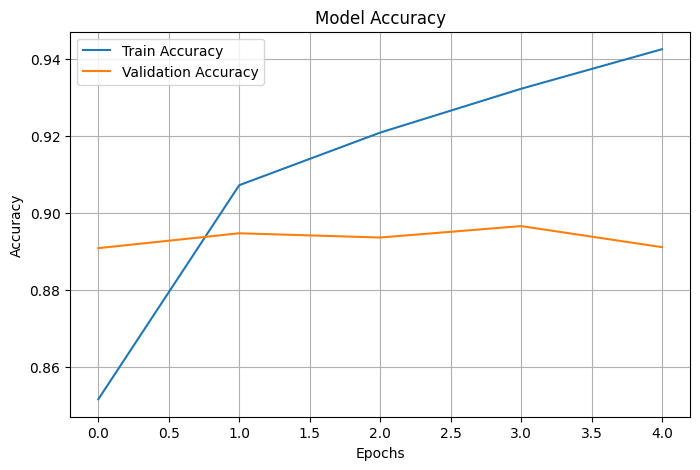

In [41]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Accuracy Plot
#Training Accuracy (blue): Increases steadily from ~85% to ~94% over epochs.
#Validation Accuracy (orange): Stays nearly flat around ~89–90% without much improvement.
#Observation:
#The model is learning well on the training set, but validation accuracy has plateaued. 
#This indicates the model may be starting to overfit — it keeps improving on training but not on unseen (validation) data.

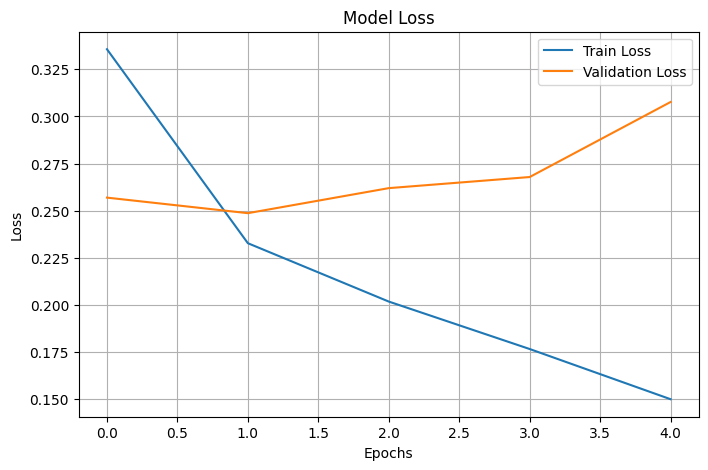

In [42]:
# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Loss Plot
#Training Loss (blue): Decreases smoothly, showing the model is fitting the training data well.
#Validation Loss (orange): Instead of decreasing, it stays almost constant at first, then starts increasing after ~2 epochs.
#Observation:
#The rising validation loss while training loss continues to decrease is a clear sign of overfitting. 
#The model is memorizing the training data instead of generalizing well.